## 1. Loading and cleaning of data

The data sets are from the website https://travel.stackexchange.com/

The file travel.stackexchange.com.7z (license: cc-by-sa 3.0) was downloaded from https://archive.org/details/stackexchange as XML files, each represents another data frame.

The data was:
- imported using Python,
- cleared - numerical data in the appropriate int or float types, dates in the datetime type, etc.
- transformed into pandas data frames,
- exported to a CSV file.

The full code needed to complete the above steps is provided below.

### Import required packages

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import io, os.path
from lxml import etree as et
import csv

Let's ignore warnings:

In [2]:
import warnings
warnings.filterwarnings("ignore")

###  Define a function that creates a dictionary for loaded tables

In [3]:
def dict_fun(root):
    root_attrib = root.attrib
    for tab in root:
        tab_dict = deepcopy(root_attrib)
        attrib_dict = {}
        attrib_dict.update(tab.attrib)
        for key, value in attrib_dict.items():
            attrib_dict.update({key:value})
        tab_dict.update(attrib_dict)
        yield tab_dict

### Load the XML files, convert to pandas data frames using the dict_fun function and save in the form of CSV

In [4]:
for frame in ['Badges','Comments','PostHistory','PostLinks','Posts','Tags','Users','Votes']:
    link = os.path.join(r'.\Travel_stack_exchange',frame)  
    tree = et.parse(link + '.xml')
    root = tree.getroot()
    tab_list = list(dict_fun(root))
    df = pd.DataFrame(tab_list)
    df = df.replace(r'\\n', ' ', regex=True)
    df = df.replace(r'\\r', ' ', regex=True)
    df.to_csv(link + ".csv", sep=';', index=False)
    df = pd.read_csv(link + ".csv", sep=';')

### Load data frames from CSV files
Create separate data frames for each csv file. 

In [5]:
Badges_df = pd.read_csv(r'.\Travel_stack_exchange\Badges.csv', sep=';')
Comments_df = pd.read_csv(r'.\Travel_stack_exchange\Comments.csv', sep=';')
PostHistory_df = pd.read_csv(r'.\Travel_stack_exchange\PostHistory.csv', sep=';')
PostLinks_df = pd.read_csv(r'.\Travel_stack_exchange\PostLinks.csv', sep=';')
Posts_df = pd.read_csv(r'.\Travel_stack_exchange\Posts.csv', sep=';')
Tags_df = pd.read_csv(r'.\Travel_stack_exchange\Tags.csv', sep=';')
Users_df = pd.read_csv(r'.\Travel_stack_exchange\Users.csv', sep=';')
Votes_df = pd.read_csv(r'.\Travel_stack_exchange\Votes.csv', sep=';')

Check the info for Badges_df:

In [6]:
Badges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136869 entries, 0 to 136868
Data columns (total 6 columns):
Id          136869 non-null int64
UserId      136869 non-null int64
Name        136869 non-null object
Date        136869 non-null object
Class       136869 non-null int64
TagBased    136869 non-null bool
dtypes: bool(1), int64(3), object(2)
memory usage: 5.4+ MB


We have almost 140k rows of data containing inforamtion about the user's Stack Exchange badges (examples: 'Supporter', 'Autobiographer', 'Teacher','Student', etc.).

We want the column displaying dates in each data frame to be of the datetime type:

In [7]:
Badges_df.Date = pd.to_datetime(Badges_df.Date)
Badges_df.head(1)

,Id,UserId,Name,Date,Class,TagBased
0,1,2,Autobiographer,2011-06-21 20:16:48.910,3,False


In [8]:
Badges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136869 entries, 0 to 136868
Data columns (total 6 columns):
Id          136869 non-null int64
UserId      136869 non-null int64
Name        136869 non-null object
Date        136869 non-null datetime64[ns]
Class       136869 non-null int64
TagBased    136869 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(3), object(1)
memory usage: 5.4+ MB


In [9]:
Comments_df.CreationDate = pd.to_datetime(Comments_df.CreationDate)
Comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193971 entries, 0 to 193970
Data columns (total 7 columns):
Id                 193971 non-null int64
PostId             193971 non-null int64
Score              193971 non-null int64
Text               193971 non-null object
CreationDate       193971 non-null datetime64[ns]
UserId             190175 non-null float64
UserDisplayName    4673 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 10.4+ MB


In [10]:
Comments_df.head(1)

,Id,PostId,Score,Text,CreationDate,UserId,UserDisplayName
0,1,1,0,To help with the cruise line question: Where a...,2011-06-21 20:25:14.257,12.0,NaN


In [11]:
PostHistory_df.CreationDate = pd.to_datetime(PostHistory_df.CreationDate)
PostHistory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313310 entries, 0 to 313309
Data columns (total 9 columns):
Id                   313310 non-null int64
PostHistoryTypeId    313310 non-null int64
PostId               313310 non-null int64
RevisionGUID         313310 non-null object
CreationDate         313310 non-null datetime64[ns]
UserId               281379 non-null float64
Text                 278411 non-null object
Comment              157666 non-null object
UserDisplayName      6402 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 21.5+ MB


In [12]:
PostHistory_df.head(1)

,Id,PostHistoryTypeId,PostId,RevisionGUID,CreationDate,UserId,Text,Comment,UserDisplayName
0,1,2,1,1e04af17-3bdb-4263-aa46-97ee7fb1b0b6,2011-06-21 20:19:34.730,9.0,My finance and myself are looking for a good C...,NaN,NaN


In [13]:
PostLinks_df.CreationDate = pd.to_datetime(PostLinks_df.CreationDate)
PostLinks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19812 entries, 0 to 19811
Data columns (total 5 columns):
Id               19812 non-null int64
CreationDate     19812 non-null datetime64[ns]
PostId           19812 non-null int64
RelatedPostId    19812 non-null int64
LinkTypeId       19812 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 774.0 KB


In [14]:
PostLinks_df.head(1)

,Id,CreationDate,PostId,RelatedPostId,LinkTypeId
0,168,2011-06-21 20:49:19.747,28,25,1


The column 'DeletionDate' in Posts_df is missing, according to `meta.stackexchange.com/question/2677/database-schema-documentation-for-the-public-data-dump-and-sede\` this column does not exist for the data dump. So the data frame is correct. 

In [15]:
Posts_df.ClosedDate = pd.to_datetime(Posts_df.ClosedDate)
Posts_df.CommunityOwnedDate = pd.to_datetime(Posts_df.CommunityOwnedDate)
Posts_df.CreationDate = pd.to_datetime(Posts_df.CreationDate)
Posts_df.LastActivityDate = pd.to_datetime(Posts_df.LastActivityDate)
Posts_df.LastEditDate = pd.to_datetime(Posts_df.LastEditDate)
Posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87956 entries, 0 to 87955
Data columns (total 21 columns):
Id                       87956 non-null int64
PostTypeId               87956 non-null int64
AcceptedAnswerId         13490 non-null float64
CreationDate             87956 non-null datetime64[ns]
Score                    87956 non-null int64
ViewCount                31843 non-null float64
Body                     87659 non-null object
OwnerUserId              85879 non-null float64
LastEditorUserId         49424 non-null float64
LastEditDate             50123 non-null datetime64[ns]
LastActivityDate         87956 non-null datetime64[ns]
Title                    31843 non-null object
Tags                     31843 non-null object
AnswerCount              31843 non-null float64
CommentCount             87956 non-null int64
ClosedDate               7215 non-null datetime64[ns]
FavoriteCount            7664 non-null float64
ParentId                 52013 non-null float64
LastEditorDi

In [16]:
Posts_df.head(1)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Title,Tags,AnswerCount,CommentCount,ClosedDate,FavoriteCount,ParentId,LastEditorDisplayName,CommunityOwnedDate,OwnerDisplayName
0,1,1,393.0,2011-06-21 20:19:34.730,8,443.0,<p>My fiancée and I are looking for a good Car...,9.0,101.0,2011-12-28 21:36:43.910,...,What are some Caribbean cruises for October?,<caribbean><cruising><vacations>,4.0,4,2013-02-25 23:52:47.953,NaN,NaN,NaN,NaT,NaN


In [17]:
Tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 5 columns):
Id               1784 non-null int64
TagName          1784 non-null object
Count            1784 non-null int64
ExcerptPostId    1714 non-null float64
WikiPostId       1714 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 69.8+ KB


In [18]:
Tags_df.head(1)

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,cruising,116,2138.0,2137.0


In [19]:
Users_df.CreationDate = pd.to_datetime(Users_df.CreationDate)
Users_df.LastAccessDate = pd.to_datetime(Users_df.LastAccessDate)
Users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59328 entries, 0 to 59327
Data columns (total 13 columns):
Id                 59328 non-null int64
Reputation         59328 non-null int64
CreationDate       59328 non-null datetime64[ns]
DisplayName        59325 non-null object
LastAccessDate     59328 non-null datetime64[ns]
WebsiteUrl         11751 non-null object
Location           20000 non-null object
AboutMe            16928 non-null object
Views              59328 non-null int64
UpVotes            59328 non-null int64
DownVotes          59328 non-null int64
AccountId          59325 non-null float64
ProfileImageUrl    38425 non-null object
dtypes: datetime64[ns](2), float64(1), int64(5), object(5)
memory usage: 5.9+ MB


In [20]:
Users_df.head(1)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl
0,-1,1,2011-06-21 15:16:44.253,Community,2011-06-21 15:16:44.253,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",0,3160,16235,-1.0,NaN


In [21]:
Votes_df.CreationDate = pd.to_datetime(Votes_df.CreationDate)
Votes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698143 entries, 0 to 698142
Data columns (total 6 columns):
Id              698143 non-null int64
PostId          698143 non-null int64
VoteTypeId      698143 non-null int64
CreationDate    698143 non-null datetime64[ns]
UserId          15483 non-null float64
BountyAmount    2633 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 32.0 MB


In [22]:
Votes_df.head(1)

,Id,PostId,VoteTypeId,CreationDate,UserId,BountyAmount
0,1,1,2,2011-06-21,NaN,NaN


All data frames are in accordance with `meta.stackexchange.com/question/2677/database-schema-documentation-for-the-public-data-dump-and-sede`.

##  2. SQL Queries

Now we load the CSV files into the SQLite database. Let's use the pandas package to generate answers to six interesting queries. All data frames were exported to the SQLite database and the results generated by SQL queries were compared with those generated by the pandas.

We connect to the SQLite3 database and insert the data frames into the database "database_travel.db".

In [23]:
import sqlite3
conn = sqlite3.connect(".\database_travel.db")
Badges_df.to_sql("Badges", conn)
Comments_df.to_sql("Comments", conn)
PostHistory_df.to_sql("PostHistory", conn)
PostLinks_df.to_sql("PostLinks", conn)
Posts_df.to_sql("Posts", conn)
Tags_df.to_sql("Tags", conn)
Users_df.to_sql("Users", conn)
Votes_df.to_sql("Votes", conn)

Let's look for the ten most popular tags created by single regular Stack Exchange user: 

In [24]:
pd.read_sql_query("""
SELECT
    Tags.TagName,
    Tags.Count,
    Posts.OwnerUserId,
    Users.Location,
    Users.DisplayName
FROM Tags
JOIN Posts ON Posts.Id=Tags.WikiPostId
JOIN Users ON Users.Id=Posts.OwnerUserId
WHERE OwnerUserId != -1
ORDER BY Count DESC
LIMIT 10
""", conn)

,TagName,Count,OwnerUserId,Location,DisplayName
0,usa,3647,26.0,"Oxford, United Kingdom",Gagravarr
1,uk,3008,26.0,"Oxford, United Kingdom",Gagravarr
2,schengen,2711,140.0,"Oaxaca, Mexico",hippietrail
3,customs-and-immigration,2430,108.0,"London, UK",Ankur Banerjee
4,transit,1551,4171.0,"Giv'at Shmuel, Israel",Ari Brodsky
5,trains,1219,26.0,"Oxford, United Kingdom",Gagravarr
6,passports,1198,1375.0,Kuwait,Burhan Khalid
7,indian-citizens,1190,140.0,"Oaxaca, Mexico",hippietrail
8,canada,1019,101.0,"Sydney, New South Wales, Australia",Mark Mayo
9,luggage,1004,4995.0,None,pnuts


The same results can obtained with a different method:

In [25]:
Tags_df.merge(Posts_df, left_on="WikiPostId", right_on="Id"
             ).merge(Users_df, left_on="OwnerUserId", right_on="Id"
             ).loc[:,["TagName","Count","OwnerUserId","Location","DisplayName"]].sort_values("Count", ascending=False
             ).query('OwnerUserId != -1 and OwnerUserId == OwnerUserId').reset_index(drop=True).head(10)

,TagName,Count,OwnerUserId,Location,DisplayName
0,usa,3647,26.0,"Oxford, United Kingdom",Gagravarr
1,uk,3008,26.0,"Oxford, United Kingdom",Gagravarr
2,schengen,2711,140.0,"Oaxaca, Mexico",hippietrail
3,customs-and-immigration,2430,108.0,"London, UK",Ankur Banerjee
4,transit,1551,4171.0,"Giv'at Shmuel, Israel",Ari Brodsky
5,trains,1219,26.0,"Oxford, United Kingdom",Gagravarr
6,passports,1198,1375.0,Kuwait,Burhan Khalid
7,indian-citizens,1190,140.0,"Oaxaca, Mexico",hippietrail
8,canada,1019,101.0,"Sydney, New South Wales, Australia",Mark Mayo
9,luggage,1004,4995.0,NaN,pnuts


There are over 3 thousands uses of tags `usa` and `uk` both by the same user with the DispalyName 'Gagravarr'. Another popular tags are `schengen` and `customs-and-immigration`. 

How many up-votes does each post have? But we ignore the Posts.Score column in this query:

In [26]:
pd.read_sql_query("""
SELECT
PostId,
COUNT(*) AS UpVotes
FROM Votes
WHERE VoteTypeId=2
GROUP BY PostId
""", conn)

,PostId,UpVotes
0,1,10
1,2,36
2,3,15
3,4,9
4,5,13
...,...,...
84227,121652,3
84228,121653,1
84229,121655,1
84230,121656,1


The same results can obtained with a pandas method:

In [27]:
Votes_df.query('VoteTypeId == 2').loc[:,["PostId"]].groupby("PostId").size().rename("UpVotes").reset_index()

,PostId,UpVotes
0,1,10
1,2,36
2,3,15
3,4,9
4,5,13
...,...,...
84227,121652,3
84228,121653,1
84229,121655,1
84230,121656,1


We can sort by the number by up-votes to check out the most popular posts. But let's get to another query.

Here we are going to list the titles and quality measures of popular(over 10k views) and liked(over 25 likes) questions:

In [28]:
pd.read_sql_query("""
SELECT
    Title,
    Score,
    ViewCount,
    FavoriteCount
FROM Posts
WHERE PostTypeId=1 AND FavoriteCount >= 25 AND ViewCount>=10000
""", conn)

,Title,Score,ViewCount,FavoriteCount
0,When traveling to a country with a different c...,140,19835.0,37.0
1,"How can I do a ""broad"" search for flights?",103,40359.0,54.0
2,Tactics to avoid getting harassed by corrupt p...,169,15562.0,46.0
3,How to avoid drinking vodka?,158,16577.0,32.0
4,Flight tickets: buy two weeks before even duri...,119,56191.0,41.0
5,"OK we're all adults here, so really, how on ea...",319,83913.0,82.0
6,Why are one-way plane tickets more expensive t...,55,28612.0,25.0
7,Japanese etiquette: Most common (and offensive...,61,28726.0,28.0
8,Is it possible to make a decent income from tr...,57,10100.0,40.0
9,Why are airline passengers asked to lift up wi...,219,123363.0,35.0


The same results can obtained with a pandas method:

In [29]:
Posts_df.query('PostTypeId == 1 and FavoriteCount >= 25 and ViewCount >= 10000'
              ).loc[:,["Title","Score","ViewCount","FavoriteCount"]].reset_index(drop=True)

,Title,Score,ViewCount,FavoriteCount
0,When traveling to a country with a different c...,140,19835.0,37.0
1,"How can I do a ""broad"" search for flights?",103,40359.0,54.0
2,Tactics to avoid getting harassed by corrupt p...,169,15562.0,46.0
3,How to avoid drinking vodka?,158,16577.0,32.0
4,Flight tickets: buy two weeks before even duri...,119,56191.0,41.0
5,"OK we're all adults here, so really, how on ea...",319,83913.0,82.0
6,Why are one-way plane tickets more expensive t...,55,28612.0,25.0
7,Japanese etiquette: Most common (and offensive...,61,28726.0,28.0
8,Is it possible to make a decent income from tr...,57,10100.0,40.0
9,Why are airline passengers asked to lift up wi...,219,123363.0,35.0


There is only 17 questions that fit the chosen views and favorites count. The most viewed is `'Why are airline passengers asked to lift up window shades during takeoff and landing?'` and the most liked is `'How do you know if Americans genuinely/literally mean what they say?'`. The first one is actually interesting, but the second one is not really about traveling. Let's get to the next one.

Let's fine th top 10 topics (often users ask new questions that have already been answered, then the community creates relevant links between the questions).

In [30]:
pd.read_sql_query("""
SELECT
    Posts.Title,
    RelatedTab.NumLinks
FROM (
SELECT
    RelatedPostId AS PostId,
    COUNT(*) AS NumLinks
FROM PostLinks
GROUP BY RelatedPostId
) AS RelatedTab
JOIN Posts ON RelatedTab.PostId=Posts.Id
WHERE Posts.PostTypeId=1
ORDER BY NumLinks DESC
LIMIT 10
""", conn)

,Title,NumLinks
0,Is there a way to find out if I need a transit...,789
1,Do I need a visa to transit (or layover) in th...,758
2,Should my first trip be to the country which i...,389
3,Should I submit bank statements when applying ...,386
4,How does the Schengen 90/180 rule work?,239
5,I have two passports/nationalities. How do I u...,233
6,How much electronics and other valuables can I...,224
7,UK visa refusal on V 4.2 a + c (and sometimes ...,209
8,Do I need a US visa to transit (or layover) th...,200
9,Schengen Visa Refusal: Justification for the p...,153


The same results can obtained with a pandas method with additionaly created data frame `RelatedTab`:

In [31]:
RelatedTab = PostLinks_df.loc[:,["RelatedPostId"]].groupby("RelatedPostId").size().rename("Count"
                        ).reset_index().rename(columns=dict(RelatedPostId="PostId",Count="NumLinks"))

In [32]:
RelatedTab.merge(Posts_df, left_on="PostId", right_on="Id").query('PostTypeId == 1'
                ).loc[:,["Title","NumLinks"]].sort_values("NumLinks", ascending=False).reset_index(drop=True).head(10)

,Title,NumLinks
0,Is there a way to find out if I need a transit...,789
1,Do I need a visa to transit (or layover) in th...,758
2,Should my first trip be to the country which i...,389
3,Should I submit bank statements when applying ...,386
4,How does the Schengen 90/180 rule work?,239
5,I have two passports/nationalities. How do I u...,233
6,How much electronics and other valuables can I...,224
7,UK visa refusal on V 4.2 a + c (and sometimes ...,209
8,Do I need a US visa to transit (or layover) th...,200
9,Schengen Visa Refusal: Justification for the p...,153


The most linked topic is `'Is there a way to find out if I need a transit visa for a layover in the UK?'` and the second most linked topic is `'Do I need a visa to transit (or layover) in the Schengen area?'`. Both about transit and layover in either United Kingdom or Schengen area. Many topics talk about Schengen or Visa, so basically people are trying to prepare for their trips in advance to make them go smothly without any problems when they are on their vacations or business trips.

Now let's count the votes for and against the posts, up-votes and down-votes, with more than 0 votes. So if they have any votes at all. Note: we specifically ignore the Posts.Score column again.

In [33]:
pd.read_sql_query("""
SELECT
    UpVotesTab.PostId,
    UpVotesTab.UpVotes,
    IFNULL(DownVotesTab.DownVotes, 0) AS DownVotes
FROM (
SELECT
    PostId,
    COUNT(*) AS UpVotes
FROM Votes
WHERE VoteTypeId=2
GROUP BY PostId
) AS UpVotesTab
LEFT JOIN (
SELECT
    PostId,
    COUNT(*) AS DownVotes
FROM Votes
WHERE VoteTypeId=3
GROUP BY PostId
) AS DownVotesTab
ON UpVotesTab.PostId=DownVotesTab.PostId
""", conn)

,PostId,UpVotes,DownVotes
0,1,10,2
1,2,36,0
2,3,15,1
3,4,9,1
4,5,13,0
...,...,...,...
84227,121652,3,0
84228,121653,1,0
84229,121655,1,1
84230,121656,1,0


The same results can obtained with a pandas method, but again we need to make some additional tables for up-votes and down-votes, and only then we can marge them to achieve the same results as in SQL query.

In [34]:
UpVotesTab = Votes_df.query('VoteTypeId == 2').loc[:,["PostId"]].groupby("PostId").size().rename("UpVotes").reset_index()

In [35]:
DownVotesTab = Votes_df.query('VoteTypeId == 3').loc[:,["PostId"]].groupby("PostId").size().rename("DownVotes").reset_index()

In [36]:
pd.merge(UpVotesTab,DownVotesTab,on="PostId",how="left").loc[:,["PostId","UpVotes","DownVotes"]].replace(np.NaN, '0')

,PostId,UpVotes,DownVotes
0,1,10,2
1,2,36,0
2,3,15,1
3,4,9,1
4,5,13,0
...,...,...,...
84227,121652,3,0
84228,121653,1,0
84229,121655,1,1
84230,121656,1,0


Let's get the top ten posts with the highest number of up-votes with corresponding titles.

In [37]:
pd.read_sql_query("""
SELECT
    UpVotesTab.*,
    Posts.Title
FROM (
SELECT
    PostId,
    COUNT(*) AS UpVotes
FROM Votes
WHERE VoteTypeId=2
GROUP BY PostId
) AS UpVotesTab
JOIN Posts ON UpVotesTab.PostId=Posts.Id
WHERE Posts.PostTypeId=1
ORDER BY UpVotesTab.UpVotes DESC
LIMIT 10
""", conn)

,PostId,UpVotes,Title
0,3080,320,"OK we're all adults here, so really, how on ea..."
1,38177,276,How do you know if Americans genuinely/literal...
2,24540,234,How to intentionally get denied entry to the U...
3,20207,220,Why are airline passengers asked to lift up wi...
4,96447,185,Why prohibit engine braking?
5,98367,184,"Boss is asking for passport, but it has a stam..."
6,1224,170,Tactics to avoid getting harassed by corrupt p...
7,2539,158,How to avoid drinking vodka?
8,66845,150,I don't know my nationality. How can I visit D...
9,70827,150,"OK, we are all adults here, so what is a bidet..."


The same results can obtained with a pandas method:

In [38]:
UpVotesTab = Votes_df.query('VoteTypeId == 2').loc[:,["PostId"]].groupby("PostId").size().rename("UpVotes").reset_index()

In [39]:
UpVotesTab.merge(Posts_df, left_on="PostId", right_on="Id").query('PostTypeId == 1'
            ).loc[:,["PostId","UpVotes","Title"]].sort_values("UpVotes", ascending=False).reset_index(drop=True).head(10)

,PostId,UpVotes,Title
0,3080,320,"OK we're all adults here, so really, how on ea..."
1,38177,276,How do you know if Americans genuinely/literal...
2,24540,234,How to intentionally get denied entry to the U...
3,20207,220,Why are airline passengers asked to lift up wi...
4,96447,185,Why prohibit engine braking?
5,98367,184,"Boss is asking for passport, but it has a stam..."
6,1224,170,Tactics to avoid getting harassed by corrupt p...
7,2539,158,How to avoid drinking vodka?
8,66845,150,I don't know my nationality. How can I visit D...
9,70827,150,"OK, we are all adults here, so what is a bidet..."


We can notice that the second and fourth rows are the same as we listed in one of the previous queries. The post with most up-votes is `"OK we're all adults here, so really, how on earth should I use a squat toilet?"`. Toilet question it is! 

## 3. Data analysis

I want to look at the analysis of data from the point of view of the airline carriers.

1. In the first step, it seems interesting to check the competition. Which airlines appear most often as tags? We will analyze global airlines divided into geographical regions of Europe, North America, Asia, and Africa.
2. Where do the website users come from? The result will allow us to determine which countries to target the advertising campaign, where there is a greater interest in travel. I narrow down my search to Europe in this section.
3. What economic and climatic factors affect the number of users from a given location? We will use additional data from the Internet to create our own tables, which we will later analyze using machine learning from the sklearn package.
4. And finally, which airports are the most popular among the website users. Again, we will use data taken from the Internet, which includes city/airport names and IATA codes of given airports, and then search posts and comments for those keywords. Posts and comments come from the entire data set, so statements from people around the world are also taken into account, but only European cities and airports are of interest.

Load data visualisation packages:

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
pd.set_option("display.notebook_repr_html", False)

Now we choose the top most popular European airlines. Those are: 
- Ryanair (Ireland)
- Wizz Air (Hungary)
- Lufthansa (Germany)
- KLM (Netherlands)
- Aegean Airlines (Greece)
- Lot Polish Airlines (Poland)
- Air France (France)
- airBaltic (Latvia)
- Easyjet (UK)
- British Airways (UK)
- Aer Lingus (Ireland)  
  
And see how often do they appear as tags in `Tags_df`. We also add a `Color` column to differentiate each geographical region. Europe is green. 

In [41]:
europ_airlies = Tags_df.query('TagName in ["ryanair", "wizz-air", "lufthansa", "klm","aegean-airlines","lot-polish-airlines","air-france","airbaltic","easyjet","british-airways","aer-lingus"]'
                             ).loc[:,["TagName","Count"]].sort_values(by = "Count", ascending=False).reset_index(drop=True)
europ_airlies['Color'] = 'g'
for i in range(0,len(europ_airlies)):
    europ_airlies.TagName[i] = europ_airlies.TagName[i].title().replace("-"," ")
europ_airlies

                TagName  Count Color
0       British Airways    120     g
1               Ryanair    103     g
2             Lufthansa     80     g
3                   Klm     49     g
4               Easyjet     45     g
5              Wizz Air     31     g
6            Air France     28     g
7             Airbaltic      7     g
8            Aer Lingus      4     g
9   Lot Polish Airlines      3     g
10      Aegean Airlines      2     g

Clearly some of the airlines are more popular than others. Which is even better shown by a bar plot:

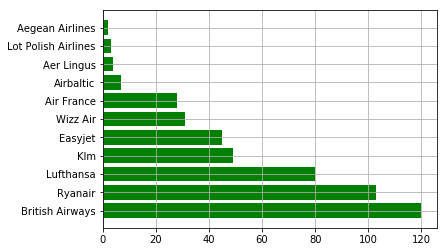

In [42]:
plt.barh(europ_airlies.TagName,europ_airlies.Count, color=europ_airlies.Color)
plt.grid()

To seek the top most popular American airlines we will do some web scraping of wikipedia page:

In [43]:
web_namer_airlines = pd.read_html("https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States")

By previewing the tags in the Travel Stack Exchange database we can see the tendency of tags constructions. We modify he scraped list by replacing space with a dash, and only lowercase letters.

In [44]:
namer_airlines_list = []
namer_airlines = web_namer_airlines[0].iloc[:,0]
for i in range(0,len(namer_airlines)):
    namer_airlines[i] = namer_airlines[i].replace(' ', '-').lower()
namer_airlines_list = namer_airlines.values.tolist()
namer_airlines_list

['alaska-airlines',
 'allegiant-air',
 'american-airlines',
 'delta-air-lines',
 'frontier-airlines',
 'hawaiian-airlines',
 'jetblue-airways',
 'southwest-airlines',
 'spirit-airlines',
 'sun-country-airlines',
 'united-airlines']

Again we will see how often do they appear as tags in `Tags_df`. The `Color` column to differentiate geographical region for the North America is pink. 

In [45]:
namer_airlies = Tags_df.query('TagName in @namer_airlines_list').loc[:,["TagName","Count"]].sort_values(by = "Count", ascending=False).reset_index(drop=True)
namer_airlies['Color'] = 'm'
for i in range(0,len(namer_airlies)):
    namer_airlies.TagName[i] = namer_airlies.TagName[i].title().replace("-"," ")
namer_airlies

              TagName  Count Color
0     United Airlines    129     m
1   American Airlines    111     m
2     Delta Air Lines     48     m
3     Spirit Airlines     19     m
4     Alaska Airlines     17     m
5  Southwest Airlines     11     m
6       Allegiant Air      5     m
7   Frontier Airlines      3     m
8   Hawaiian Airlines      2     m

Some tags may not match the airline names used on the Stack Exchange website, e.g. Jet Blue Airways appear as jetblue, rather than jetblue-airways. For proper operation you would need to use several variants for each name, e.g. jetblue-airways, jet-blue-airways, jetblue, etc.

The results can be presented as horizontal bar plot:

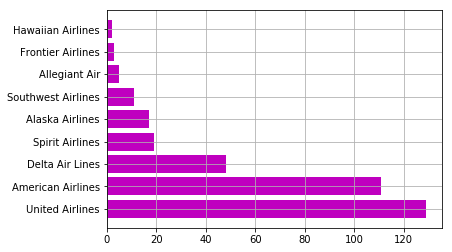

In [46]:
plt.barh(namer_airlies.TagName,namer_airlies.Count, color=namer_airlies.Color)
plt.grid()

To seek the top most popular Asia airlines we will again do some web scraping of wikipedia page:

In [47]:
web_asia_airlines = pd.read_html("https://en.wikipedia.org/wiki/List_of_largest_airlines_in_Asia")

In [48]:
asia_airlines = web_asia_airlines[0].iloc[:,2]

In [49]:
asia_airlines

0           China Southern Airlines
1          China Eastern Airlines 1
2                      Air China 21
3                 Hainan Airlines 8
4                  Air Asia Group 2
5                            IndiGo
6                Emirates Airline 5
7                  Lion Air Group 6
8              All Nippon Airways 3
9                  Japan Airlines 4
10              Garuda Indonesia 18
11       Singapore Airlines Group 9
12                 Cathay Pacific 7
13                           Saudia
14                    Qatar Airways
15                   Jet Airways 10
16                     Air India 11
17                    Korean Air 13
18                      VietJet Air
19                 Vietnam Airlines
20                  Cebu Pacific 19
21    Thai Airways International 14
22                         SpiceJet
23                Etihad Airways 12
24               Asiana Airlines 16
25           Philippine Airlines 20
26                China Airlines 17
27                          

In [50]:
len(asia_airlines)

30

In [51]:
asia_airlines.loc[4]

'Air Asia Group 2'

The names downloaded from the website have additional digits at the end and do not allow easy use. Therefore, we applies a loop with few steps and a condition to remove unwanted numbers.

In [52]:
for i in range(0,len(asia_airlines)):
    asia_airlines.loc[i] = asia_airlines.loc[i].replace(' ', '-').lower()
    for j in range(0,3):
        if asia_airlines.loc[i][-1] in ['0','1','2','3','4','5','6','7','8','9','-']:
            asia_airlines.loc[i] = asia_airlines.loc[i][:-1]
asia_airlines_list = asia_airlines.values.tolist()
asia_airlines_list

['china-southern-airlines',
 'china-eastern-airlines',
 'air-china',
 'hainan-airlines',
 'air-asia-group',
 'indigo',
 'emirates-airline',
 'lion-air-group',
 'all-nippon-airways',
 'japan-airlines',
 'garuda-indonesia',
 'singapore-airlines-group',
 'cathay-pacific',
 'saudia',
 'qatar-airways',
 'jet-airways',
 'air-india',
 'korean-air',
 'vietjet-air',
 'vietnam-airlines',
 'cebu-pacific',
 'thai-airways-international',
 'spicejet',
 'etihad-airways',
 'asiana-airlines',
 'philippine-airlines',
 'china-airlines',
 'goair',
 'malaysia-airlines',
 'eva-airways']

Again we will see how often do they appear as tags in `Tags_df`. The `Color` column to differentiate geographical region for the Asia is yellow.  
The list from Wikipedia is not perfect, the Emirates airline that is the most popular is missing, but we can add it manually.

In [53]:
asia_airlies = Tags_df.query('TagName in ["china-southern-airlines","china-eastern-airlines","air-china","hainan-airlines","air-asia-group","emirates","indigo","lion-air-group","all-nippon-airways","japan-airlines","garuda-indonesia","cathay-pacific","singapore-airlines","saudia","qatar-airways","jet-airways","korean-air","air-india","vietnam-airlines","malaysia-airlines","thai-airways-international","cabu-pacific","etihad","asiana-airlines","spicejet","vietjet-air","s7-airlines","china-airlines","philippine-airlines","eva-airways","goair"]').loc[:,["TagName","Count"]].sort_values(by = "Count", ascending=False).reset_index(drop=True)
asia_airlies['Color'] = 'y'
for i in range(0,len(asia_airlies)):
    asia_airlies.TagName[i] = asia_airlies.TagName[i].title().replace("-"," ")
asia_airlies

                    TagName  Count Color
0                  Emirates     86     y
1             Qatar Airways     76     y
2                 Air India     36     y
3        Singapore Airlines     28     y
4                    Etihad     28     y
5               Jet Airways     22     y
6                Korean Air     16     y
7            Cathay Pacific     14     y
8                 Air China     14     y
9   China Southern Airlines     13     y
10        Malaysia Airlines     11     y
11           China Airlines     11     y
12      Philippine Airlines      8     y
13                 Spicejet      7     y
14                    Goair      3     y
15          Asiana Airlines      2     y

The results can be presented as horizontal bar plot:

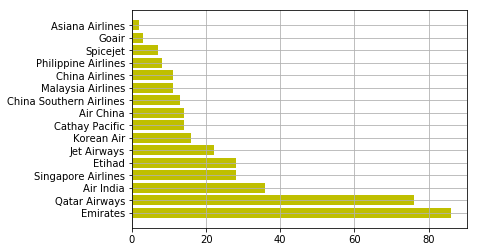

In [54]:
plt.barh(asia_airlies.TagName,asia_airlies.Count, color=asia_airlies.Color)
plt.grid()

Last let's seek the top most popular African airlines. We will again do some web scraping of wikipedia page:

In [55]:
web_africa_airlines = pd.read_html("https://en.wikipedia.org/wiki/List_of_largest_airlines_in_Africa")

In [56]:
africa_airlines = web_africa_airlines[2].iloc[:,2]
africa_airlines

0       Ethiopian Airlines 4
1                 EgyptAir 5
2          Royal Air Maroc 6
3    South African Airways 1
4            Kenya Airways 2
5                 Tunisair 7
6                Air Algérie
7                   Arik Air
8            Air Mauritius 3
9            Libyan Airlines
Name: Airline / Holding, dtype: object

In [57]:
for i in range(0,len(africa_airlines)):
    africa_airlines.loc[i] = africa_airlines.loc[i].replace(' ', '-').lower()
    for j in range(0,3):
        if africa_airlines.loc[i][-1] in ['0','1','2','3','4','5','6','7','8','9','-']:
            africa_airlines.loc[i] = africa_airlines.loc[i][:-1]
africa_airlines_list = africa_airlines.values.tolist()
africa_airlines_list

['ethiopian-airlines',
 'egyptair',
 'royal-air-maroc',
 'south-african-airways',
 'kenya-airways',
 'tunisair',
 'air-algérie',
 'arik-air',
 'air-mauritius',
 'libyan-airlines']

Again we will see how often do they appear as tags in `Tags_df`. The `Color` column to differentiate geographical region for  Africa is red. 

In [58]:
africa_airlies = Tags_df.query('TagName in ["ethiopian-airlines","egyptair","royal-air-maroc","south-african-airways","kenya-airways","tunisair","air-algerie","arik-air","air-mauritius","libyan-airlines"]').loc[:,["TagName","Count"]].sort_values(by = "Count", ascending=False).reset_index(drop=True)
africa_airlies['Color'] = 'r'
for i in range(0,len(africa_airlies)):
    africa_airlies.TagName[i] = africa_airlies.TagName[i].title().replace("-"," ")
africa_airlies

                 TagName  Count Color
0     Ethiopian Airlines      5     r
1        Royal Air Maroc      3     r
2          Kenya Airways      3     r
3  South African Airways      1     r

The results can be presented as horizontal bar plot:

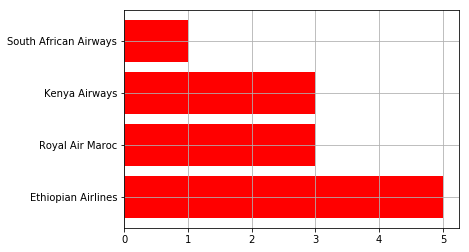

In [59]:
plt.barh(africa_airlies.TagName,africa_airlies.Count, color=africa_airlies.Color)
plt.grid()

Let's concatanate prepared data frames from 4 geographical regions:

In [60]:
frames = [europ_airlies, namer_airlies, asia_airlies, africa_airlies]
airlies = pd.concat(frames).sort_values(by = "Count", ascending=False).reset_index(drop=True)
airlies

                    TagName  Count Color
0           United Airlines    129     m
1           British Airways    120     g
2         American Airlines    111     m
3                   Ryanair    103     g
4                  Emirates     86     y
5                 Lufthansa     80     g
6             Qatar Airways     76     y
7                       Klm     49     g
8           Delta Air Lines     48     m
9                   Easyjet     45     g
10                Air India     36     y
11                 Wizz Air     31     g
12                   Etihad     28     y
13               Air France     28     g
14       Singapore Airlines     28     y
15              Jet Airways     22     y
16          Spirit Airlines     19     m
17          Alaska Airlines     17     m
18               Korean Air     16     y
19           Cathay Pacific     14     y
20                Air China     14     y
21  China Southern Airlines     13     y
22       Southwest Airlines     11     m
23        Malays

In [61]:
airlies.groupby(["Color"])

In [62]:
hh = airlies.Color.astype("category").value_counts()
hh.index.all

<bound method make_invalid_op.<locals>.invalid_op of CategoricalIndex(['y', 'g', 'm', 'r'], categories=['g', 'm', 'r', 'y'], ordered=False, dtype='category')>

Now let's see all chosen airlines together:

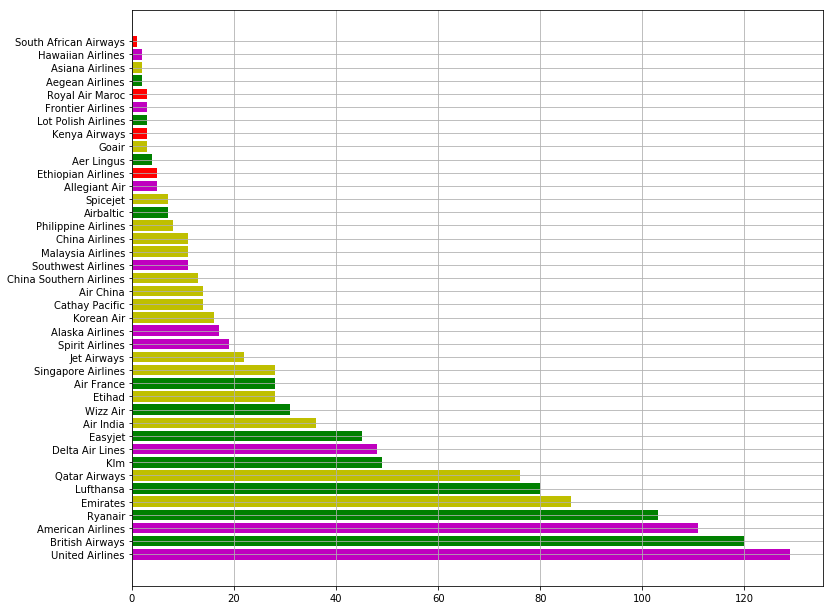

In [63]:
airlies["Color"] = airlies.Color.astype("category")
fig= plt.figure(figsize=(12,10))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
plt.grid()
axes.barh(airlies.TagName,airlies.Count, color=airlies.Color)
plt.show()